In [ ]:
"Module on motecarlo method."

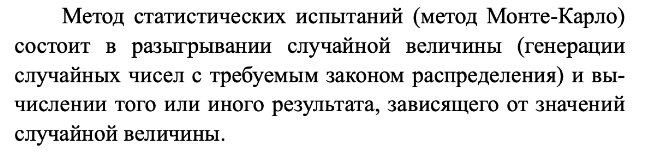

In [3]:
import numpy as np
import pandas as pd

# надстройка над матплотлиб
# import seaborn as sns

In [4]:
# кидаем кубик
print(np.random.randint(1, 7))

5


In [9]:
# грани кубика
x_cube: list[int] = np.arange(1, 7)
print(x_cube)

[1 2 3 4 5 6]


In [10]:
# void
np.random.shuffle(x_cube)
# [4, 5, 1, 6, 2, 3]

In [13]:
print(x_cube)

[1 6 3 2 4 5]


In [14]:
# выборка без повторений, replace=False
# мы берём грань и не возвращаем её
print(np.random.choice([1, 2, 3, 4, 5, 6], size=6, replace=False))

[6 3 1 5 4 2]


In [15]:
# чтобы воспроизвести результаты эксперимента, нужно задать сиид
print(np.random.seed(321))

#  выборка с повторением
# [5, 3, 5, 2, 1, 2, 1, 3, 1, 5] # 321
print(np.random.choice([1, 2, 3, 4, 5, 6], size=10, replace=True))

None
[5 3 5 2 1 2 1 3 1 5]


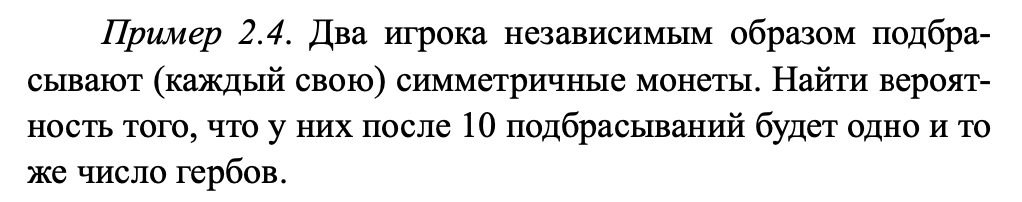

In [23]:
n_: int = 10**4  # > 10000 , > 100000
# счётчик благоприятствующих
m_: int = 0
# Начальная установка датчика случайных чисел
np.random.seed(310)

# создаем модель

for i_ in range(0, n_):
    # 10 подбрасываний монетки
    a_: float = np.random.choice([0, 1], p=[0.5, 0.5], size=10)
    b_: float = np.random.choice([0, 1], p=[0.5, 0.5], size=10)

    if sum(a_) == sum(b_):
        m_ += 1

# относительная частота событий
proba: float = m_ / n_
# 0.176369
print(f"Размер выборки - {n_}, вероятность{round(proba,2)}")

Размер выборки - 10000, вероятность0.18


In [24]:
sum([1, 1, 1, 1, 1, 1, 1, 1, 0, 1]) == sum([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

True

In [25]:
# монетка
#  sample - выборка
type(pd.Series([0, 1]).sample(1))
# pandas.core.series.Series

pandas.core.series.Series

In [26]:
# numpy.int64
type(pd.Series([0, 1]).sample(1).values[0])

numpy.int64

In [120]:
pd.Series([0, 1]).sample(1).values[0] + 1

2

In [136]:
# выборка с повторением
pd.Series([0, 1]).sample(10, replace=True)

0    0
1    1
0    0
1    1
0    0
1    1
1    1
1    1
0    0
1    1
dtype: int64

In [163]:
# ДСВ, PMF
# монетка
np.random.binomial(1, 0.5)

1

In [168]:
# ДСВ, PMF
# монетка 3 раза
np.random.binomial(1, 0.5, size=3)

array([1, 0, 1])

In [171]:
# побрасываем 3 раза монетку

result: list[int] = []
#  O(n)
for _ in range(3):
    result.append(np.random.binomial(1, 0.5))

In [170]:
print(result)

[1, 1, 0]

In [174]:
# побрасываем 3 раза монетку
[np.random.binomial(1, 0.5) for _ in range(3)]

[0, 1, 0]

In [181]:
# создаем функцию подбрасывания монетки


def coin_toss():
    return pd.Series([0, 1]).sample(1).values[0]

In [177]:
# создаем функцию подбрасывания монетки


def coin_toss2():
    return np.random.binomial(1, 0.5)

In [205]:
coin_toss(), coin_toss2()

(0, 0)

In [209]:
result: list[int] = []
for _ in range(3):
    result.append(coin_toss())

In [210]:
print(result)

[1, 1, 0]

In [211]:
[coin_toss() for _ in range(3)]

[0, 1, 0]

In [212]:
[coin_toss2() for _ in range(3)]

[0, 0, 1]

In [213]:
# монетка 10 выборок
# выборка с повторением
pd.Series([0, 1]).sample(10, replace=True)

1    1
0    0
1    1
0    0
0    0
1    1
0    0
1    1
0    0
0    0
dtype: int64

In [219]:
# кубик 10 выборок
pd.Series([1, 2, 3, 4, 5, 6]).sample(10, replace=True)

1    2
3    4
4    5
3    4
5    6
3    4
1    2
0    1
5    6
0    1
dtype: int64

In [221]:
# выдадим общий индекс, и уберем 1 колонку - индексы
pd.Series([1, 2, 3, 4, 5, 6]).sample(10, replace=True).reset_index()

,index,0
0,0,1
1,3,4
2,4,5
3,1,2
4,2,3
5,2,3
6,1,2
7,2,3
8,2,3
9,1,2


In [222]:
# уберем 1 колонку - индексы
pd.Series([1, 2, 3, 4, 5, 6]).sample(10, replace=True).reset_index(drop=True)

0    1
1    3
2    5
3    6
4    5
5    6
6    4
7    6
8    4
9    1
dtype: int64

In [232]:
# кубик 1000 подбрасываний, посчитаем количество каждой грани
# для дискретной переменной, чтобы посмотреть распределение
# нужно value_counts
# дсв
pd.Series(np.random.randint(1, 7, size=10000)).value_counts()

1    1710
4    1693
3    1679
5    1650
6    1635
2    1633
Name: count, dtype: int64